In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import nltk
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_data.csv', encoding = 'latin1')
df

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [3]:
df=df.rename(columns={"0":"Cancer_Type","a":"Report"})
df=df[['Report','Cancer_Type']]
df

,Report,Cancer_Type
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer
...,...,...
7565,we report the case of a 24yearold man who pres...,Colon_Cancer
7566,among synchronous colorectal cancers scrcs rep...,Colon_Cancer
7567,the heterogeneity of cancer cells is generally...,Colon_Cancer
7568,"""adipogenesis is the process through which mes...",Colon_Cancer


In [4]:
df.isnull().sum()

Report         0
Cancer_Type    0
dtype: int64

In [5]:
df.duplicated().sum()


6574

In [13]:
df

,Report,Cancer_Type,clean_Report
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer,thyroid surgeri children singl institut osama ...
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer,adopt strategi use prior year base four exclus...
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer,coronari arterybypass graft thrombosi brin bri...
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer,solitari plasmacytoma sp skull uncommon clinic...
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer,studi aim investig serum matrix metalloprotein...
...,...,...,...
6863,"""Missense mutation distribution in the exons a...",Lung_Cancer,missens mutat distribut exon function domain e...
6929,"""versus gemcitabine/carboplatin in advanced no...",Lung_Cancer,versu gemcitabin carboplatin advanc non small ...
7040,Keloids are pathological scars that grow over...,Thyroid_Cancer,keloid patholog scar grow time extend beyond i...
7485,the anization of cells into multiple membranou...,Colon_Cancer,aniz cell multipl membran compart specif bioch...


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df['Cancer_Type'].value_counts()

Lung_Cancer       452
Thyroid_Cancer    283
Colon_Cancer      261
Name: Cancer_Type, dtype: int64

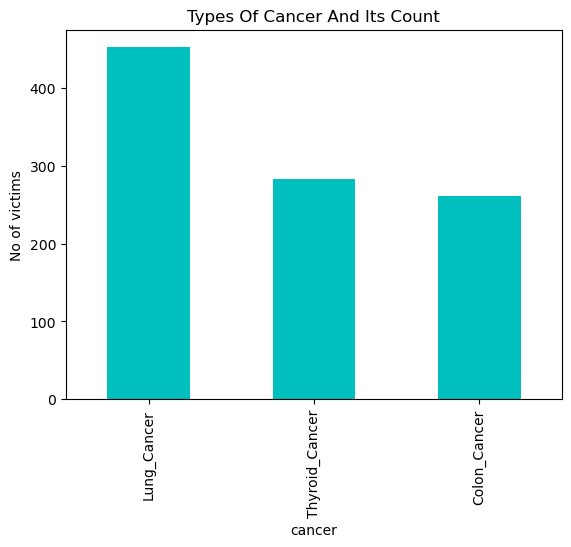

In [9]:
plt.title("Types Of Cancer And Its Count")
plt.ylabel("No of victims")
plt.xlabel("cancer")
df['Cancer_Type'].value_counts().plot.bar(color="c")
plt.show()

In [10]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['clean_Report'] = df['Report'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Report,Cancer_Type,clean_Report
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer,thyroid surgeri children singl institut osama ...
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer,adopt strategi use prior year base four exclus...
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer,coronari arterybypass graft thrombosi brin bri...
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer,solitari plasmacytoma sp skull uncommon clinic...
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer,studi aim investig serum matrix metalloprotein...
...,...,...,...
6863,"""Missense mutation distribution in the exons a...",Lung_Cancer,missens mutat distribut exon function domain e...
6929,"""versus gemcitabine/carboplatin in advanced no...",Lung_Cancer,versu gemcitabin carboplatin advanc non small ...
7040,Keloids are pathological scars that grow over...,Thyroid_Cancer,keloid patholog scar grow time extend beyond i...
7485,the anization of cells into multiple membranou...,Colon_Cancer,aniz cell multipl membran compart specif bioch...


In [11]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")

X = df['clean_Report']
Y = df['Cancer_Type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=57018)),
                     ('clf', LogisticRegression(random_state=0))])


# #Training model
model = pipeline.fit(X_train, y_train)


In [12]:
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.7333333333333333


['Colon_Cancer' 'Lung_Cancer' 'Thyroid_Cancer' 'Lung_Cancer'
 'Colon_Cancer' 'Thyroid_Cancer' 'Lung_Cancer' 'Thyroid_Cancer'
 'Colon_Cancer' 'Colon_Cancer' 'Thyroid_Cancer' 'Lung_Cancer'
 'Thyroid_Cancer' 'Colon_Cancer' 'Thyroid_Cancer' 'Thyroid_Cancer'
 'Lung_Cancer' 'Thyroid_Cancer' 'Lung_Cancer' 'Thyroid_Cancer'
 'Lung_Cancer' 'Colon_Cancer' 'Thyroid_Cancer' 'Thyroid_Cancer'
 'Colon_Cancer' 'Thyroid_Cancer' 'Thyroid_Cancer' 'Thyroid_Cancer'
 'Thyroid_Cancer' 'Lung_Cancer' 'Colon_Cancer' 'Lung_Cancer'
 'Colon_Cancer' 'Colon_Cancer' 'Thyroid_Cancer' 'Colon_Cancer'
 'Lung_Cancer' 'Thyroid_Cancer' 'Thyroid_Cancer' 'Lung_Cancer'
 'Thyroid_Cancer' 'Lung_Cancer' 'Thyroid_Cancer' 'Lung_Cancer'
 'Thyroid_Cancer' 'Colon_Cancer' 'Lung_Cancer' 'Lung_Cancer'
 'Thyroid_Cancer' 'Lung_Cancer' 'Colon_Cancer' 'Lung_Cancer'
 'Colon_Cancer' 'Lung_Cancer' 'Lung_Cancer' 'Lung_Cancer' 'Lung_Cancer'
 'Colon_Cancer' 'Lung_Cancer' 'Colon_Cancer' 'Lung_Cancer' 'Lung_Cancer'
 'Lung_Cancer'